# Porftolio Optimization of a cryptocurrency-portfolio

## About this notebook

In general, portfolio optimization is the process of selecting the best portfolio (asset allocation), out of an asset portfolio, according to some objectives [1]. In the following notebook, we will explain two methods for Asset Allocation on a portfolio based on 20 cryptocurrencies: Monte Carlo Simulation and Mathematical Optimization. Furthermore, we will compare the result of the crypto-portfolio optimization with optimizations performed on a mixed-portfolio (cryptocurrencies and stocks) and a portfolio based on selected stocks of the S&P 500.  

## 1. Assumptions of MPT

- Asset returns are normally distributed random variables
- Investors are regarded as rational and risk-averse
- Investors all have access to the same sources of information for investment decisions, i.e no information-asymmetry
- Investors share similar views on expected returns
- No consideration of taxes or fees of any kind
- The user of the model is a price taker, not a price maker (i.e. the investor is unable to influence the exercise price of his/her investment by any invested amount of money)
- Investors have unlimited access to borrow (and lend) money at the risk free rate
- Assumption that an investor is not allowed to set up short positions in
  a security. Only long positions are allowed. 
- By market risk, we consider both positive and negative deviations of the actual return from the expected one


For further information, see [2] and [3] 

## 2. Modern portfolio theory 

Modern portfolio theory (MPT) or mean-variance analysis is a mathematical framework on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk [4]. Moreover, one of the core statements of the theory is, that owning different type of assets is less risky than owing just one type. 

Harry Markowitz introduced MPT in 1952, and such work led him to be awarded a with Nobel price in economics [5]. 


### 2.1. Risk and expected return:

* **Portfolio Return: ** Is the proportion-weighted combination of the constitutent asset's return.

* **Portfolio volatility: ** Is a function of the correlation $\rho_ij$ of the component assets, for all asset pairs *(i,j)*.

###  2.2. Mathematical model: 

**Expected return**

$$E(R_p)=\sum_{i}w_iE(R_i)$$

Where $R_p$ is the return of the portfolio, $R_i$ is the return on asset $i$ ans $w_i$ is the weighting of component asset (or the proportion of asset $i$ in the portfolio)

    
**Portfolio return variance**

$$\sigma_p^2 = \sum_{i}w_i^2\sigma_i^2 + \sum_{i}\sum_{j}w_iw_j\sigma_i\sigma_j\rho_{ij}$$


Where $\sigma$ is the standard deviation (sample) of the periodic returns on an asset, and $\rho_{ij}$ is the correlation coefficient between the returns on assets i and j. Alternatively the expression can be written as:

$$\sigma_p^2 = \sum_{i}\sum_{j}w_iw_j\sigma_i\sigma_j\rho_{ij}$$

Where $\rho_{ij} = 1$ for $i=j$, or

$$\sigma_p^2 = \sum_{i}\sum_{j}w_iw_j\sigma_{ij}$$


where $\sigma_{ij} = \sigma_i\sigma_j\rho_{ij}$ is the (sample) covariance of the periodic returns on the two assets, or alternatively denoted as $\sigma(i,j), cov_{ij}$ or $cov(i,j)$.

**Portfolio return volatility (standard deviation)**

$$\sigma_p = \sqrt{\sigma_p^2}$$


The mathematical model definition of the portfolio volatility relies on an algebraic representation, expensive to calculate when the number of assets within the portfolio is big. In perspective, the expression tends to increment its size at a $2x + 1$ rate per asset:

* 2 assets:

$$\sigma_p^2 = w_A^2\sigma_A^2 + w_B^2\sigma_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{AB}$$

* 3 assets:

$$\sigma_p^2 = w_A^2\sigma_A^2 + w_B^2\sigma_B^2 + w_C^2\sigma_C^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{AB} + 2w_Aw_C\sigma_A\sigma_C\rho_{AC} + 2w_Bw_C\sigma_B\sigma_C\rho_{BC}$$


Then one of the main contributions delivered by Markowitz with his work, is the representation of the overall standard deviation or risk  in a matricial form which are computationally much cheaper to calculate.

$$
E(R_p) = \left(\begin{array}{cc} 
w_1 &  w_2 & ... & w_n
\end{array}\right).
\left(\begin{array}{cc} 
E(R_1)\\ 
E(R_2)\\
...\\
E(R_n)
\end{array}\right)
$$

$$
\sigma_p^2 = \left(\begin{array}{cc} 
w_1 &  w_2 & ... & w_n
\end{array}\right).
\left(\begin{array}{cc} 
\sigma^2(A_{11}) & \sigma^2(A_{12})  & ... & \sigma^2(A_{1n}) \\
\sigma^2(A_{21}) & \sigma^2(A_{22})  & ... & \sigma^2(A_{2n}) \\
... & ...  & ... & ... \\
\sigma^2(A_{m1}) & \sigma^2(A_{m2})  & ... & \sigma^2(A_{mn}) \\
\end{array}\right).
\left(\begin{array}{cc} 
w_1\\ 
w_2\\
...\\
w_n
\end{array}\right)
$$

## Import Libraries

In [1]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_crypto = pd.read_csv('crypto_20_test.csv')

In [3]:
df_crypto['time'] =  pd.to_datetime(df_crypto['time'], format='%Y-%m-%d')

In [4]:
df_crypto.set_index('time', inplace=True)

In [5]:
#df_new = df_crypto[(df_crypto.index >= '2016-01-01')]
#df_new = df_crypto[(df_crypto.index >= '2016-01-01') & (df_crypto.index <= '2018-12-07')]
df_crypto_1 = df_crypto[(df_crypto.index >= '2018-01-01') & (df_crypto.index <= '2018-09-01')]

In [6]:
df_crypto_1.isnull().values.sum()

0

In [7]:
df_crypto_1.tail()

BTC     XRP     ETH      DOGE    LTC   BTB  BITCNY     XMR  \
time                                                                         
2018-08-28  7091.38  0.3508  295.55  0.002590  63.16  4.63  0.1509  107.48   
2018-08-29  7052.00  0.3447  288.67  0.002662  61.54  4.61  0.1469  103.50   
2018-08-30  6998.76  0.3348  284.15  0.003100  60.23  4.20  0.1458  103.14   
2018-08-31  7026.96  0.3348  281.66  0.004753  62.13  4.25  0.1464  116.14   
2018-09-01  7203.46  0.3468  295.36  0.006061  66.47  6.48  0.1441  120.88   

            BLOCK     XWC    DCR      NXT   FCT    DASH    MAID       BCN  \
time                                                                        
2018-08-28   6.51  0.1004  41.29  0.07488  6.20  193.89  0.2779  0.002269   
2018-08-29   6.28  0.1049  41.71  0.07320  5.99  186.88  0.2751  0.002045   
2018-08-30   5.80  0.1115  42.13  0.07188  5.80  184.67  0.2626  0.002030   
2018-08-31   5.49  0.1065  42.92  0.07196  5.83  194.25  0.2698  0.002249   
2018-09-01   5.50  0.1030  45.17  0.07765  6.62  222.37  0.2824  0.002593   

               BTS        SC      DGB  MONA  
time                                         
2018-08-28  0.1204  0.006595  0.02943  1.56  
2018-08-29  0.1189  0.006276  0.02912  1.54  
2018-08-30  0.1141  0.006019  0.03065  1.49  
2018-08-31  0.1178  0.006395  0.03092  1.46  
2018-09-01  0.1262  0.007708  0.03400  1.47

#### The Data


The price data for all individual cryptocurrencies contained in the csv-file above were obtained from crypto-exchanges, and then merged into a master file. The price-data timeframe ranges from 2016-01-01 till 2018-12-07. The final data contains the following coins:

- Top 5 crypto-coins (based on highest market cap):
    - Bitcoin (BTC)
    - Ripple (XRP)
    - Ethereum (ETH)    
    - Litecoin (LTC)
    - Monero (XMR)


- Randomly Selection of coins:
    - BitBar (BTB)
    - Decred (DCR)
    - Nxt (NXT)
    - Factom (FCT)
    - Dash (DASH)
    - MaidSafeCoin (MAID)
    - Bytecoin (BCN)
    - BitShares (BTS)
    - Siacoin (SC)
    - DigiByte (DGB)
    - MonaCoin (MONA)
    - Dogecoin (DOGE)
    - bitCNY (BITCNY)
    - Blocknet (BLOCK)
    - WhiteCoin (XWC)
    

### Simple Returns vs. Log Returns

Why log-returns? The main benefit of using log-returns versus prices is normalization: measuring all variables in a comparable metric enables to evaluate relationships amongst two or more assets of originally unequal values.


>>>$$r_{i} = \frac{p_i - p_j}{p_j},$$
<break>
where $r_i$ is return at time $i$, $p_i$ is the price at time $i$ and $j = i-1$.

#### Calculate Log Returns

We transform **returns** equation to **log returns** equation:

>>>$$r_{i} = \frac{p_i - p_j}{p_j}$$

>>>$$r_i = \frac{p_i}{p_j} - \frac{p_j}{p_j}$$

>>>$$1 + r_i = \frac{p_i}{p_j}$$


>>>$$log(1+r_i) = log(\frac{p_i}{p_j})$$

>>>$$log(1+r_i) = log(p_i) - log(p_j)$$

Now, we apply the log returns equation to closing prices of cryptocurrencies:

In [8]:
log_return_1 = np.log(df_crypto_1/df_crypto_1.shift(1))

In [9]:
log_return_1.mean() * len(log_return_1)

BTC      -0.626605
XRP      -1.784159
ETH      -0.943980
DOGE     -0.361896
LTC      -1.221418
BTB      -1.712608
BITCNY   -1.172673
XMR      -1.032984
BLOCK    -2.036735
XWC      -0.712917
DCR      -0.878441
NXT      -2.102442
FCT      -2.293538
DASH     -1.528912
MAID     -1.374424
BCN      -0.828239
BTS      -1.784439
SC       -1.381787
DGB      -0.731541
MONA     -1.902876
dtype: float64

In [10]:
log_return_1.cov() * len(log_return_1)

BTC       XRP       ETH      DOGE       LTC       BTB    BITCNY  \
BTC     0.534758  0.591684  0.530915  0.633823  0.566654  0.572035  0.493383   
XRP     0.591684  1.160899  0.742107  0.874003  0.765008  0.628045  0.516779   
ETH     0.530915  0.742107  0.779056  0.700342  0.672975  0.707380  0.484089   
DOGE    0.633823  0.874003  0.700342  1.538159  0.789076  0.770561  0.578520   
LTC     0.566654  0.765008  0.672975  0.789076  0.841962  0.688473  0.529104   
BTB     0.572035  0.628045  0.707380  0.770561  0.688473  3.715852  0.441769   
BITCNY  0.493383  0.516779  0.484089  0.578520  0.529104  0.441769  1.010946   
XMR     0.624413  0.808473  0.717082  0.807763  0.754617  0.656483  0.572319   
BLOCK   0.597353  0.754962  0.656570  0.708695  0.662805  0.612729  0.525851   
XWC     0.636514  0.839172  0.699605  0.831617  0.712759  0.822004  0.589947   
DCR     0.607784  0.745954  0.700498  0.770524  0.711232  0.664731  0.583767   
NXT     0.629144  0.926807  0.724250  0.911472  0.759271  0.728058  0.539539   
FCT     0.630125  0.937871  0.781346  0.915353  0.730950  0.784189  0.587290   
DASH    0.573756  0.798018  0.701407  0.810371  0.727974  0.692180  0.533665   
MAID    0.619692  0.845748  0.746058  0.837564  0.746900  0.768608  0.560659   
BCN     0.874418  1.076373  0.982271  1.468713  1.008776  1.110418  0.791218   
BTS     0.720150  1.074163  0.876728  1.068133  0.875470  0.856678  0.628627   
SC      0.794743  1.135621  0.921927  1.351112  0.943867  0.975610  0.703946   
DGB     0.770249  1.102528  0.889943  1.162700  0.909057  1.035227  0.668864   
MONA    0.549300  0.729888  0.600336  0.668582  0.656599  0.542350  0.492407   

             XMR     BLOCK       XWC       DCR       NXT       FCT      DASH  \
BTC     0.624413  0.597353  0.636514  0.607784  0.629144  0.630125  0.573756   
XRP     0.808473  0.754962  0.839172  0.745954  0.926807  0.937871  0.798018   
ETH     0.717082  0.656570  0.699605  0.700498  0.724250  0.781346  0.701407   
DOGE    0.807763  0.708695  0.831617  0.770524  0.911472  0.915353  0.810371   
LTC     0.754617  0.662805  0.712759  0.711232  0.759271  0.730950  0.727974   
BTB     0.656483  0.612729  0.822004  0.664731  0.728058  0.784189  0.692180   
BITCNY  0.572319  0.525851  0.589947  0.583767  0.539539  0.587290  0.533665   
XMR     1.051605  0.754982  0.875988  0.827444  0.857814  0.894105  0.810613   
BLOCK   0.754982  1.517231  0.791743  0.679307  0.846994  0.783827  0.662904   
XWC     0.875988  0.791743  2.002246  0.747672  0.979695  0.856009  0.764922   
DCR     0.827444  0.679307  0.747672  1.155437  0.813463  0.917272  0.729732   
NXT     0.857814  0.846994  0.979695  0.813463  1.321426  0.943789  0.810617   
FCT     0.894105  0.783827  0.856009  0.917272  0.943789  1.550184  0.807287   
DASH    0.810613  0.662904  0.764922  0.729732  0.810617  0.807287  0.926061   
MAID    0.859018  0.829740  0.888827  0.841715  0.977638  0.924601  0.791572   
BCN     0.993493  1.015194  1.077434  1.001899  1.092186  1.109637  1.024760   
BTS     0.967764  0.914533  0.994770  0.939917  1.109692  1.119871  0.930650   
SC      1.012040  1.047493  1.136201  1.022837  1.118557  1.189321  1.043869   
DGB     0.987972  0.999486  1.096126  0.961453  1.158343  1.166656  0.956794   
MONA    0.701864  0.733431  0.833440  0.751287  0.837842  0.847767  0.680806   

            MAID       BCN       BTS        SC       DGB      MONA  
BTC     0.619692  0.874418  0.720150  0.794743  0.770249  0.549300  
XRP     0.845748  1.076373  1.074163  1.135621  1.102528  0.729888  
ETH     0.746058  0.982271  0.876728  0.921927  0.889943  0.600336  
DOGE    0.837564  1.468713  1.068133  1.351112  1.162700  0.668582  
LTC     0.746900  1.008776  0.875470  0.943867  0.909057  0.656599  
BTB     0.768608  1.110418  0.856678  0.975610  1.035227  0.542350  
BITCNY  0.560659  0.791218  0.628627  0.703946  0.668864  0.492407  
XMR     0.859018  0.993493  0.967764  1.012040  0.987972  0.701864  
BLOCK   0.829740  1.015194  0.

## Monte Carlo Simulation for Asset Allocation

### The Basic Theory

For a given set of securities, we must determine what various risk-return profiles exist. Our tool to this end is Monte Carlo Simulation. Monte Carlo Simulation is method of repeated random sampling from a probability distribution to obtain numerical results. [6]

With Monte Carlo simulation we will generate random portfolio weighting allocations and record the expected return and variance.
The following code below generates 20 random numbers between 0 and 1 and then normalizes the values such that the sum of all values equals 1. [7]

We calculate an expected portfolio return and expected portfolio standard deviation for each profile. The resulting ratio of returns to standard deviations is referred to as the **Sharpe Ratio**.

The Sharpe Ratio is technically defined as the expected excess return of the portfolio over the risk-free short rate $r_f$ divided by the expected standard deviation of the portfolio. For simplicity, we assume $r_f$ = 0



Mathematically, it is represented as $$SR = \frac{μ_p - r_f}{σ_p}$$ <br>

where $SR$ is the Sharpe Ratio, $μ_p$ is the average return of investment, and $r_f$ is the best available rate of return of a risk free security.

In [11]:
# Code is influenced by: https://towardsdatascience.com/efficient-frontier-optimize-portfolio-with-scipy-57456428323e

np.random.seed(101)
num_of_ite_1 = 50000
all_weights_1 = np.zeros((num_of_ite_1,len(df_crypto_1.columns)))
port_return_1 = np.zeros(num_of_ite_1)
port_vol_1 = np.zeros(num_of_ite_1)
sharpe_ratio_1 = np.zeros(num_of_ite_1)

for i in range(num_of_ite_1):
    weights_1 = np.array(np.random.random(20))
    weights_1 = weights_1 / np.sum(weights_1)
    all_weights_1[i,:] = weights_1
    port_return_1[i] = np.sum((log_return_1.mean() * weights_1) *len(log_return_1))
    port_vol_1[i] = np.sqrt(np.dot(weights_1.T, np.dot(log_return_1.cov() * len(log_return_1), weights_1)))
    sharpe_ratio_1[i] = port_return_1[i]/port_vol_1[i]

In order to calculate portfolio return and volatility, we need to multiply by number of business days, which is len (log_return).

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

Text(0, 0.5, 'Expected Return')

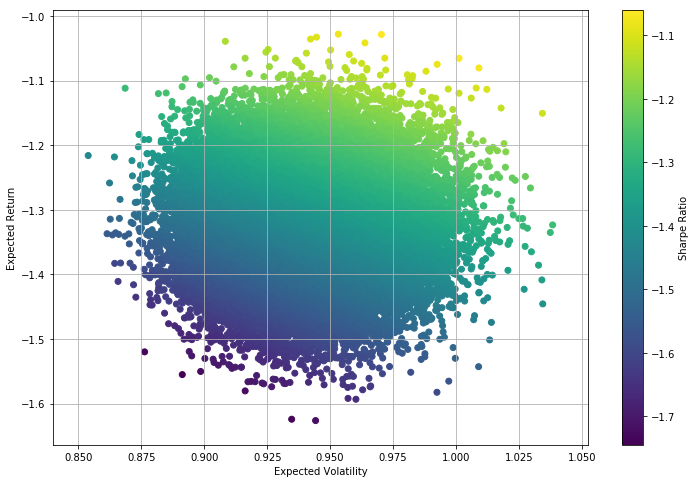

In [12]:
max_port_return = port_return_1[sharpe_ratio_1.argmax()]
max_port_vol = port_vol_1[sharpe_ratio_1.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_1,y=port_return_1,c=sharpe_ratio_1)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Mathematical Optimization for Asset Allocation

In [13]:
def get_ret_vol_sr(weights_1):
    weights_1 = np.array(weights_1)
    ret = np.sum(log_return_1.mean() * weights_1) * len(log_return_1)
    vol = np.sqrt(np.dot(weights_1.T, np.dot(log_return_1.cov() * len(log_return_1), weights_1)))
    sr = ret/vol
    return np.array([ret,vol,sr])

### Maximum Sharpe Ratio

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [14]:
#def neg_sharpe(weights):
#    return  get_ret_vol_sr(weights)[2] * -1

In [15]:
#def check_sum(weights):
#    return np.sum(weights) - 1

In [16]:
#cons = ({'type':'eq','fun': check_sum})
#noa = len(df_new.columns)
#bounds = tuple((0, 1) for x in range(noa))
#init_guess = noa * [1. / noa,]
#opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [17]:
#opt_results

In [18]:
#opt_ret_vol_sr = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
#ames = ['Return', 'Volatility', 'Sharpe Ratio']
#pt_ret_vol_sr.columns=names
#pt_ret_vol_sr

If using the above weighting for investment, it will get the below number

- 4.4727 is portfolio expected return
- 1.7103 is portfolio volatility
- 2.6152 is sharpe ratio

In other words, this yields to an expected return of about 447.27%, the expected volatility is about 171.03%, and the resulting optimal Sharpe ratio is 2.6152.

In [19]:
#optimal_sharpe = pd.DataFrame(opt_results['x'].round(4)).T
#optimal_sharpe.columns=list(df_new.columns)
#optimal_sharpe

These 20 numbers mean the 'best' weighting for the portfolio

### Alternative way to maximize Sharpe Ratio 

Our optimization tool for this analysis is the **optimize** method from the library **SciPy** [8].

Let's define our objective function as a function which takes an array of weights as an input and returns the Expected Return, Expected Volatility and Sharpe Ratio.

In this case, we will seek to maximize the second element of the objective function's result, that is the Sharpe Ratio. We will also pass a few constraints to the optimization which limits the sum of the weights to 1.

In [20]:
def statistics(weights_1):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights_1 = np.array(weights_1)
    pret_1 = np.sum(log_return_1.mean()*weights_1)*len(log_return_1)
    pvol_1 = np.sqrt(np.dot(weights_1.T,np.dot(log_return_1.cov()*len(log_return_1),weights_1)))
    psharp_1 = pret_1/pvol_1
    return np.array([pret_1, pvol_1, psharp_1])

In [21]:
import scipy.optimize as sco
def min_func_sharpe(weights_1):
    return statistics(weights_1)[2] * -1

In [22]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(df_crypto_1.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [23]:
opts_1 = sco.minimize(min_func_sharpe, x0, method='SLSQP',bounds=bnds, constraints=cons)

In [24]:
opts_1

     fun: 0.2917988507552452
     jac: array([3.84994268e-01, 1.27277220e+00, 6.28276046e-01, 3.72529030e-09,
       8.35142486e-01, 1.23470416e+00, 8.35783333e-01, 6.79662138e-01,
       1.50778521e+00, 4.17065002e-01, 5.62118229e-01, 1.52229737e+00,
       1.67564249e+00, 1.07903706e+00, 9.49313186e-01, 3.89189180e-01,
       1.23617027e+00, 8.57826643e-01, 3.69273242e-01, 1.40746378e+00])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.00000000e+00, 1.44988057e-15, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.62207872e-15, 0.00000000e+00, 0.00000000e+00,
       1.12486979e-15, 0.00000000e+00, 0.00000000e+00, 1.43960446e-15,
       2.16432751e-15, 0.00000000e+00, 2.92620696e-17, 1.12410081e-14,
       1.90602187e-15, 1.89811406e-15, 1.17407539e-14, 3.17493404e-16])

In [25]:
optimal_weights_1 = opts_1.x

In [26]:
optimal_sharpe_1 = pd.DataFrame(opts_1['x']).T
optimal_sharpe_1.columns=list(df_crypto_1.columns)
optimal_sharpe_1.round(4)

BTC  XRP  ETH  DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  DCR  NXT  FCT  \
0  0.0  0.0  0.0   1.0  0.0  0.0     0.0  0.0    0.0  0.0  0.0  0.0  0.0   

   DASH  MAID  BCN  BTS   SC  DGB  MONA  
0   0.0   0.0  0.0  0.0  0.0  0.0   0.0

In [27]:
#optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x'])).T
#names = ['Return', 'Volatility', 'Sharpe Ratio']
#optimal_ret_vol_sr.columns = names
#optimal_ret_vol_sr.round(4)

In [28]:
# Optimal shape for the first backtest
optimal_sharpe_out_1 = optimal_sharpe_1.transpose()
optimal_sharpe_out_1.sort_values(by=[0], ascending=False).head(5)

0
DOGE  1.000000e+00
DGB   1.174075e-14
BCN   1.124101e-14
FCT   2.164328e-15
BTS   1.906022e-15

BTC       XRP       ETH      DOGE       LTC       BTB  \
time                                                                     
2018-09-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-02  1.013577  0.985294  0.998849  0.794753  0.996239  1.359568   
2018-09-03  1.009244  0.964533  0.978365  0.853655  0.983602  1.121914   
2018-09-04  1.023100  0.952710  0.965703  0.871473  1.018204  1.742284   
2018-09-05  0.930807  0.804210  0.772853  0.821977  0.868512  1.649691   

              BITCNY       XMR     BLOCK       XWC       DCR       NXT  \
time                                                                     
2018-09-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-02  1.023595  0.991976  0.956364  1.161165  0.984060  0.984417   
2018-09-03  1.009022  1.116231  0.985455  1.119417  0.947974  1.007469   
2018-09-04  1.022901  1.142455  0.985455  1.113592  0.948196  1.032582   
2018-09-05  1.163081  0.949371  0.834545  1.043689  0.807173  0.891178   

                 FCT      DASH      MAID       BCN       BTS        SC  \
time                                                                     
2018-09-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-02  0.987915  0.957233  1.015935  0.957192  0.977021  0.956668   
2018-09-03  0.983384  0.977560  1.025142  0.953336  0.961173  0.952647   
2018-09-04  1.052870  0.976840  1.062323  0.994601  0.970681  0.984821   
2018-09-05  0.793051  0.778342  0.843839  0.827613  0.784707  0.765439   

                 DGB      MONA  
time                            
2018-09-01  1.000000  1.000000  
2018-09-02  0.953529  0.945578  
2018-09-03  0.990000  0.952381  
2018-09-04  0.986176  0.938776  
2018-09-05  0.788824  0.748299

time
2018-11-01    632073.915196
Name: Total Pos, dtype: float64


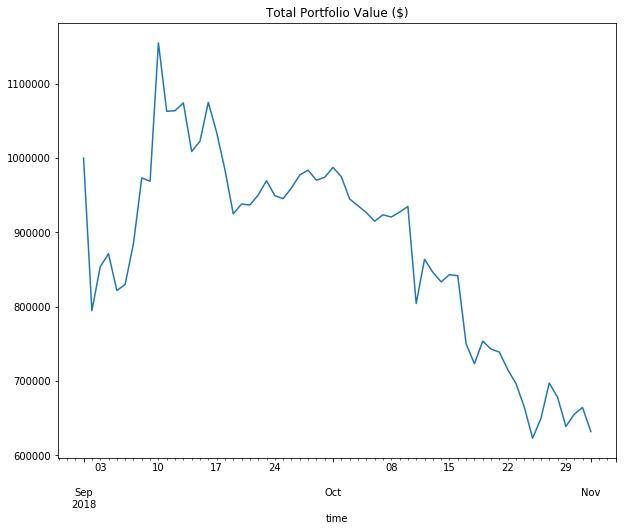

In [29]:
## Backtest 1
df_forecast_1 = df_crypto[(df_crypto.index >= '2018-09-01') & (df_crypto.index <= '2018-11-01')]

df_returns = []

for elements in df_forecast_1:
    #print (elements)
    df_returns.append(df_forecast_1[elements]/ df_forecast_1.iloc[0][elements])

df = pd.DataFrame(df_returns)

df_norm = df.transpose()

display(df_norm.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc = []


for allocation in df_norm:
    
    df_alloc.append(df_norm[allocation] * optimal_sharpe_1.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc = pd.DataFrame(df_alloc)

df_alloc = df_alloc.transpose() * 1000000

df_alloc.tail()

df_alloc['Total Pos'] = df_alloc.sum(axis = 1)

df_alloc['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc['Total Pos'].tail(1))

In [30]:
# restricting the dataset for Optimization 2
df_opt_2 = df_crypto[(df_crypto.index >= '2018-01-01') & (df_crypto.index <= '2018-11-01')]
df_opt_2.tail()
log_return_2 = np.log(df_opt_2/df_opt_2.shift(1))

In [31]:
# Optimization 2
np.random.seed(101)
num_of_ite = 50000
all_weights_2 = np.zeros((num_of_ite,len(df_opt_2.columns)))
port_return_2 = np.zeros(num_of_ite)
port_vol_2 = np.zeros(num_of_ite)
sharpe_ratio_2 = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(len(df_opt_2.columns)))
    weights = weights / np.sum(weights)
    all_weights_2[i,:] = weights
    port_return_2[i] = np.sum((log_return_2.mean() * weights) *len(log_return_2))
    port_vol_2[i] = np.sqrt(np.dot(weights.T, np.dot(log_return_2.cov() * len(log_return_2), weights)))
    sharpe_ratio_2[i] = port_return_2[i]/port_vol_2[i]

Text(0, 0.5, 'Expected Return')

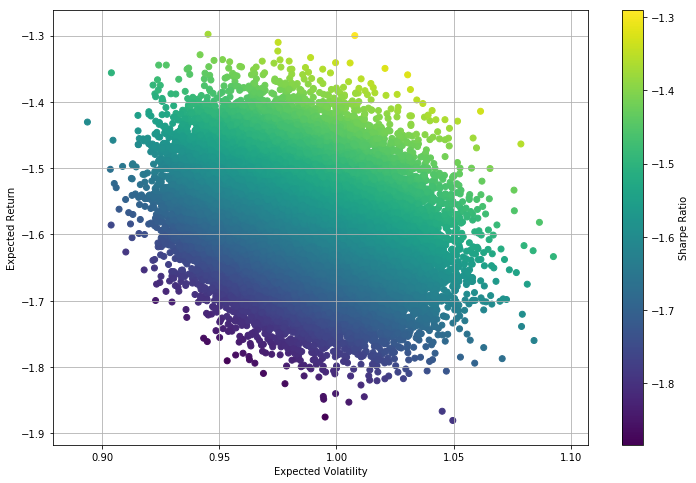

In [32]:
# Distribution of the simulated Portfolio (II)
max_port_return_2 = port_return_2[sharpe_ratio_2.argmax()]
max_port_vol_2 = port_vol_2[sharpe_ratio_2.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_2,y=port_return_2,c=sharpe_ratio_2)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [33]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return_2.mean()*weights)*len(log_return_2)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return_2.cov()*len(log_return_2),weights)))
    return np.array([pret,pvol,pret/pvol])

In [34]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(df_opt_2.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

opts = sco.minimize(min_func_sharpe, x0, method='SLSQP',bounds=bnds, constraints=cons)


In [35]:
# Optimal shape for the second backtest
optimal_sharpe_2 = pd.DataFrame(opts['x'].round(4)).T
optimal_sharpe_2.columns=list(df_opt_2.columns)
optimal_sharpe_2

BTC  XRP  ETH  DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  DCR  NXT  FCT  \
0  0.0  0.0  0.0   1.0  0.0  0.0     0.0  0.0    0.0  0.0  0.0  0.0  0.0   

   DASH  MAID  BCN  BTS   SC  DGB  MONA  
0   0.0   0.0  0.0  0.0  0.0  0.0   0.0

In [36]:
# Optimal shape for the second backtest
optimal_sharpe_out = optimal_sharpe_2.transpose()
optimal_sharpe_out.sort_values(by=[0], ascending=False).head(5)

0
DOGE  1.0
BTC   0.0
NXT   0.0
DGB   0.0
SC    0.0

In [37]:
# Vloatility, Return, Sharpe Ratio (Backtest II)
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns=names
optimal_ret_vol_sr

Return  Volatility  Sharpe Ratio
0 -0.8219      1.3169       -0.6241

BTC       XRP       ETH      DOGE       LTC       BTB  \
time                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  1.002094  0.999347  1.011523  1.010702  1.021458  1.011321   
2018-11-03  0.999220  0.992380  1.003724  1.011224  1.009736  1.000000   
2018-11-04  1.013438  1.020248  1.063252  0.999739  1.077489  1.071698   
2018-11-05  1.008218  1.087089  1.055201  0.953015  1.065766  1.001887   

              BITCNY       XMR     BLOCK       XWC       DCR       NXT  \
time                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  1.002759  1.015366  1.007673  0.958834  1.036900  0.994081   
2018-11-03  0.999310  1.024337  1.035806  0.960787  0.995080  0.982243   
2018-11-04  1.013793  1.076637  1.025575  0.993990  1.000000  1.023520   
2018-11-05  0.892414  1.072819  0.994885  0.984976  0.971218  1.005140   

                 FCT      DASH      MAID       BCN       BTS        SC  \
time                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  0.974684  1.004067  1.013539  1.052508  1.007417  0.992393   
2018-11-03  0.959916  1.009553  1.009337  0.999216  1.007835  0.979766   
2018-11-04  0.974684  1.071585  1.042951  1.064263  1.035729  0.973984   
2018-11-05  0.953586  1.064743  1.047152  1.058777  1.011596  0.949490   

                 DGB      MONA  
time                            
2018-11-01  1.000000  1.000000  
2018-11-02  1.008200  1.043478  
2018-11-03  1.013667  1.008696  
2018-11-04  1.025513  1.017391  
2018-11-05  0.996355  0.991304

BTC  XRP  ETH           DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  \
time                                                                          
2018-12-03  0.0  0.0  0.0  354561.953473  0.0  0.0     0.0  0.0    0.0  0.0   
2018-12-04  0.0  0.0  0.0  359676.621020  0.0  0.0     0.0  0.0    0.0  0.0   
2018-12-05  0.0  0.0  0.0  366936.149150  0.0  0.0     0.0  0.0    0.0  0.0   
2018-12-06  0.0  0.0  0.0  347632.403894  0.0  0.0     0.0  0.0    0.0  0.0   
2018-12-07  0.0  0.0  0.0  352747.071440  0.0  0.0     0.0  0.0    0.0  0.0   

            DCR  NXT  FCT  DASH  MAID  BCN  BTS   SC  DGB  MONA  
time                                                             
2018-12-03  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  
2018-12-04  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  
2018-12-05  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  
2018-12-06  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  
2018-12-07  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0

BTC  XRP  ETH           DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  \
time                                                                          
2018-11-01  0.0  0.0  0.0  632073.915196  0.0  0.0     0.0  0.0    0.0  0.0   
2018-11-02  0.0  0.0  0.0  638838.475499  0.0  0.0     0.0  0.0    0.0  0.0   
2018-11-03  0.0  0.0  0.0  639168.454050  0.0  0.0     0.0  0.0    0.0  0.0   
2018-11-04  0.0  0.0  0.0  631908.925920  0.0  0.0     0.0  0.0    0.0  0.0   
2018-11-05  0.0  0.0  0.0  602375.845570  0.0  0.0     0.0  0.0    0.0  0.0   

                ...        NXT  FCT  DASH  MAID  BCN  BTS   SC  DGB  MONA  \
time            ...                                                         
2018-11-01      ...        0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   
2018-11-02      ...        0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   
2018-11-03      ...        0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   
2018-11-04      ...        0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   
2018-11-05      ...        0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   

                Total Pos  
time                       
2018-11-01  632073.915196  
2018-11-02  638838.475499  
2018-11-03  639168.454050  
2018-11-04  631908.925920  
2018-11-05  602375.845570  

[5 rows x 21 columns]

time
2018-12-07    352747.07144
Name: Total Pos, dtype: float64


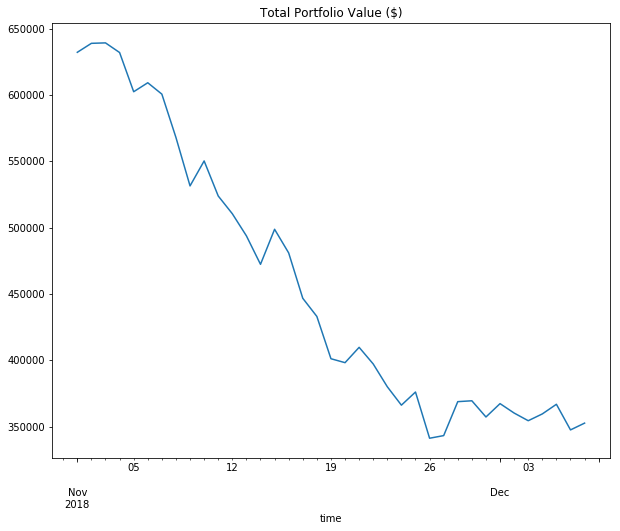

In [38]:
# Backtest II
#df_forecast_2 = df_stocks[(df_stocks.index >= '2018-05-01')]
df_forecast_2 = df_crypto[(df_crypto.index >= '2018-11-01') & (df_crypto.index <= '2018-12-07')]

df_returns_2 = []

for elements in df_forecast_2:
    #print (elements)
    df_returns_2.append(df_forecast_2[elements]/ df_forecast_2.iloc[0][elements])


df = pd.DataFrame(df_returns_2)
df_norm_2 = df.transpose()
display(df_norm_2.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc_2 = []

for allocation in df_norm_2:
    
    df_alloc_2.append(df_norm_2[allocation] * optimal_sharpe_2.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc_2 = pd.DataFrame(df_alloc_2)

total_value_1 = df_alloc['Total Pos'].iloc[-1]
total_value_1

df_alloc_2 = df_alloc_2.transpose() * total_value_1

display(df_alloc_2.tail())

df_alloc_2['Total Pos'] = df_alloc_2.sum(axis = 1)

display(df_alloc_2.head())

df_alloc_2['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc_2['Total Pos'].tail(1))

In [47]:
df_alloc['Total Pos'].to_csv('crypto_FC_1.csv')
df_alloc_2['Total Pos'].to_csv('crypto_FC_2.csv')

## References

[1] https://en.wikipedia.org/wiki/Modern_portfolio_theory

[2] Revisions of modern portfolio theory optimization model (Milan Vaclavik, Josef Jablonsky, 2011)

[3] https://medium.com/@omkardash/crypto-portfolio-optimization-python-9d38e9ebe6be

[4] https://www.investopedia.com/terms/m/modernportfoliotheory.asp

[5] https://en.wikipedia.org/wiki/Harry_Markowitz

[6] https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694

[7] Python for Finance - Analyze big financial data (Yves Hilpisch, 2015)

[8] https://github.com/yhilpisch/py4fi/blob/master/jupyter36/11_Statistics_a.ipynb